Imports & Loading Data

In [415]:
!pip install transformers --upgrade

In [416]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
import string
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.layers.experimental.preprocessing  import TextVectorization
import torch
from torch import cuda
import transformers
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertModel, DistilBertTokenizer

In [417]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('amazon_top500.csv')

Saving amazon_top500.csv to amazon_top500 (7).csv


Validating Uploaded Data

In [418]:
df.head()

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN


In [419]:
df.tail()

,title,brand,description,price/currency,price/value,stars,reviewsCount
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,$,5.99,NaN,NaN
496,GBOLE Replacement for HP Notebook 15-DY 15-DY0...,GBOLE,"Specification: Screen Size: 15.6"" Max. Resol...",$,69.00,NaN,NaN
497,DMKAOLLK USB-C Replacement for Lenovo Laptop C...,DMKAOLLK,NaN,$,16.99,NaN,NaN
498,Cloudstyle Laptop Backpack Slim Durable Colleg...,Cloudstyle,NaN,$,9.99,NaN,NaN
499,MULS L19M3PD9 57Wh Laptop Battery Replacement ...,MULS,NaN,$,75.99,NaN,NaN


Checking Null Values

In [420]:
df.isnull().sum()

title               0
brand               0
description       245
price/currency     30
price/value        30
stars             241
reviewsCount      241
dtype: int64

In [421]:
df['title'].nunique()

499

# Populating Missing Values and Data Transformations

Populating Currency Column with '$'

In [422]:
df['price/currency'] = df['price/currency'].apply(lambda x: '$' if pd.isnull(x) else x)


In [423]:
df_knn = df[['price/value','stars','reviewsCount']].copy()

In [424]:
imputer = KNNImputer(n_neighbors=5)

df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_knn), columns=df_knn.columns)

In [425]:
display(df_knn_imputed)

,price/value,stars,reviewsCount
0,13.69,4.20,55.0
1,31.99,4.90,58.0
2,5.99,4.60,42.0
3,79.99,4.20,39.0
4,46.99,3.84,1145.8
...,...,...,...
495,5.99,4.80,176.6
496,69.00,4.54,105.4
497,16.99,4.68,268.8
498,9.99,3.68,7.0


Populating Missing 'Price/value' and 'stars' and 'reviewCount' using KNN

In [426]:
df.update(df_knn_imputed[['price/value', 'stars', 'reviewsCount']])
df.head()

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.20,55.0
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.90,58.0
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.60,42.0
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.20,39.0
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,3.84,1145.8


In [427]:
df.tail()


,title,brand,description,price/currency,price/value,stars,reviewsCount
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,$,5.99,4.80,176.6
496,GBOLE Replacement for HP Notebook 15-DY 15-DY0...,GBOLE,"Specification: Screen Size: 15.6"" Max. Resol...",$,69.00,4.54,105.4
497,DMKAOLLK USB-C Replacement for Lenovo Laptop C...,DMKAOLLK,NaN,$,16.99,4.68,268.8
498,Cloudstyle Laptop Backpack Slim Durable Colleg...,Cloudstyle,NaN,$,9.99,3.68,7.0
499,MULS L19M3PD9 57Wh Laptop Battery Replacement ...,MULS,NaN,$,75.99,4.24,117.6


Creating a 'text' column that concatenates 'title' and 'description'

In [428]:
df['description'].fillna('', inplace=True)

df['text'] = df['title'] + ' ' + df['description']


print(df.head())

                                               title     brand  \
0  65W Universal USB C Chromebook Charger,Replace...  NELEBUTO   
1  EMPSIGN Laptop Tote bag for women 16 Inch, Sty...   EMPSIGN   
2  100Pcs Mario Stickers, Cartoon Game Mario Stic...    MOQIAN   
3  USB Docking Station, JESWO USB 3.0 Laptop Dock...     JESWO   
4  ANCBD C31N1824 Battery for Asus Chromebook Fli...     ANCBD   

                                         description price/currency  \
0                                                                 $   
1                                                                 $   
2  100Pcs Japanese Cartoon Game Mari Stickers for...              $   
3                                                                 $   
4  Specification: Battery Rating: 11.55V Battery ...              $   

   price/value  stars  reviewsCount  \
0        13.69   4.20          55.0   
1        31.99   4.90          58.0   
2         5.99   4.60          42.0   
3        79.99   4.2

In [429]:
with pd.option_context('display.max_colwidth',None):
    display(df)

,title,brand,description,price/currency,price/value,stars,reviewsCount,text
0,"65W Universal USB C Chromebook Charger,Replacement Lenovo Yoga Google Asus Acer Dell Laptop Charger,AC Adapter Compatible with Lenovo X1 Thinkpad 45W Type C Charger",NELEBUTO,,$,13.69,4.20,55.0,"65W Universal USB C Chromebook Charger,Replacement Lenovo Yoga Google Asus Acer Dell Laptop Charger,AC Adapter Compatible with Lenovo X1 Thinkpad 45W Type C Charger"
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Stylish Computer Shoulder Tote Bag for Work, Large Capacity Quilted Laptop Briefcase, Waterproof Women Business Office Bag, Quilted Black",EMPSIGN,,$,31.99,4.90,58.0,"EMPSIGN Laptop Tote bag for women 16 Inch, Stylish Computer Shoulder Tote Bag for Work, Large Capacity Quilted Laptop Briefcase, Waterproof Women Business Office Bag, Quilted Black"
2,"100Pcs Mario Stickers, Cartoon Game Mario Stickers for Kids, Mario Bros Decal Gifts, Waterproof Vinyl Stickers for Teen Adut Water Bottle, Laptop, Skateboard",MOQIAN,"100Pcs Japanese Cartoon Game Mari Stickers for Adult Girl Boy Notebook, Computer, Luggage, Phone, Scrapbook, Guitar, Bike, Car, Helmet, Snowboard, Bumper, Cup.",$,5.99,4.60,42.0,"100Pcs Mario Stickers, Cartoon Game Mario Stickers for Kids, Mario Bros Decal Gifts, Waterproof Vinyl Stickers for Teen Adut Water Bottle, Laptop, Skateboard 100Pcs Japanese Cartoon Game Mari Stickers for Adult Girl Boy Notebook, Computer, Luggage, Phone, Scrapbook, Guitar, Bike, Car, Helmet, Snowboard, Bumper, Cup."
3,"USB Docking Station, JESWO USB 3.0 Laptop Docking Station Dual Monitor (Dual Video HDMI & VGA, Gigabit Ethernet, Audio, and More USB Ports)-Grey",JESWO,,$,79.99,4.20,39.0,"USB Docking Station, JESWO USB 3.0 Laptop Docking Station Dual Monitor (Dual Video HDMI & VGA, Gigabit Ethernet, Audio, and More USB Ports)-Grey"
4,ANCBD C31N1824 Battery for Asus Chromebook Flip C434 C434TA Series C434TA-AI0029 C434TA-AI0045 C434TA-AI0081 C434TA-DH342T C434TA-E10001 0B200-03290000 3ICP3/91/91 C31PnC1 11.55V 48Wh/4160mAh,ANCBD,"Specification: Battery Rating: 11.55V Battery Capacity:48Wh/4160mAh Battery Type: Li-Polymer battery Condition: new battery Battery Color: Black Warranty: 12 Months Compatible Part Numbers: C31N1824 0B200-03290000 3ICP3/91/91 C31PnC1. Compatible Machine Models: For ASUS Chromebook Flip C434 Series: For ASUS Chromebook Flip C434TA Series: C434, C434TA, C434TA-1A C434TA-AI0029, C434TA-AI0030, C434TA-AI0033, C434TA-AI0040, C434TA-AI0041, C434TA-AI0043, C434TA-AI0043P C434TA-AI0045, C434TA-AI0051, C434TA-AI0060, C434TA-AI0062, C434TA-AI0063, C434TA-AI0064, C434TA-AI0080 C434TA-AI0081, C434TA-AI0084, C434TA-AI0089, C434TA-AI0094, C434TA-AI0095 C434TA-AI0107, C434TA-AI0108, C434TA-AI0109, C434TA-AI0110, C434TA-AI0115, C434TA-AI0121, C434TA-AI0122 C434TA-AI0207, C434TA-AI0225, C434TA-AI0234, C434TA-AI0259, C434TA-AI0264, C434TA-AI0276, C434TA-AI0278, C434TA-AI0296 C434TA-AI0303, C434TA-AI0304, C434TA-AI0362, C434TA-AI0364, C434TA-AI0390, C434TA-AI0394, C434TA-AI3860 C434TA-AI0403, C434TA-AI0476, C434TA-AI0477, C434TA-AI0485, C434TA-AI049, C434TA-AI0499 C434TA-AI0543, C434TA-AI0544,C434TA-AIZ030, C434TA-AIZ032 C434TA-DH342T, C434TA-DS384, C434TA-DS384T, C434TA-DS584, C434TA-DS588T, C434TA-DSM4T C434TA-E10001, C434TA-E10008, C434TA-E10011, C434TA-E10012, C434TA-E10013, C434TA-E10022 C434TA-GE384T, C434TA-GE588T, C434TA-I5-VEOUK, C434TA-M3-VEOUK, C434TA-YZ588T Compatible Part Numbers: BP3S1P2160, BP3S1P2160-S, BP3S1P2290, BP3S1P2290 A, GBM3X2 242857100001, 242888700087, 441857100001, 441888700086, 2ICP7/64/84, 3ICP6/51/61. Compatible Machine Models: Fit for Getac F110 Tablet PC Series: Getac F110 Getac F110 G2 Getac F110 G3 Getac F110 G4 F110, F110 G2 F110 GGA 734020 F110 G2-Core i5 5300U 2 3 GHZ",$,46.99,3.84,1145.8,"ANCBD C31N1824 Battery for Asus Chromebook Flip C434 C434TA Series C434TA-AI0029 C434TA-AI0045 C434TA-AI0081 C434TA-DH342T C434TA-E10001 0B200-03290000 3ICP3/91/91 C31PnC1 11.55V 48Wh/4160mAh Specification: Battery Rating: 11.55V Battery

Normalization and Tokenization of 'text' Column into a new 'Tokens' Column

In [430]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [431]:
lemmatizer = WordNetLemmatizer()

In [432]:
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

In [433]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.lower() not in punctuation]
    tokens = list(set(tokens))
    return tokens

lemmatizer = WordNetLemmatizer()

In [434]:
df['tokens'] = df['text'].apply(tokenize_text)

In [435]:
with pd.option_context('display.max_colwidth',None):
    display(df)

,title,brand,description,price/currency,price/value,stars,reviewsCount,text,tokens
0,"65W Universal USB C Chromebook Charger,Replacement Lenovo Yoga Google Asus Acer Dell Laptop Charger,AC Adapter Compatible with Lenovo X1 Thinkpad 45W Type C Charger",NELEBUTO,,$,13.69,4.20,55.0,"65W Universal USB C Chromebook Charger,Replacement Lenovo Yoga Google Asus Acer Dell Laptop Charger,AC Adapter Compatible with Lenovo X1 Thinkpad 45W Type C Charger","[compatible, thinkpad, asus, yoga, 65w, adapter, dell, chromebook, x1, universal, charger, google, usb, ac, laptop, type, acer, 45w, lenovo, c, replacement]"
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Stylish Computer Shoulder Tote Bag for Work, Large Capacity Quilted Laptop Briefcase, Waterproof Women Business Office Bag, Quilted Black",EMPSIGN,,$,31.99,4.90,58.0,"EMPSIGN Laptop Tote bag for women 16 Inch, Stylish Computer Shoulder Tote Bag for Work, Large Capacity Quilted Laptop Briefcase, Waterproof Women Business Office Bag, Quilted Black","[inch, tote, large, quilted, office, shoulder, business, waterproof, computer, bag, work, briefcase, laptop, 16, black, empsign, capacity, woman, stylish]"
2,"100Pcs Mario Stickers, Cartoon Game Mario Stickers for Kids, Mario Bros Decal Gifts, Waterproof Vinyl Stickers for Teen Adut Water Bottle, Laptop, Skateboard",MOQIAN,"100Pcs Japanese Cartoon Game Mari Stickers for Adult Girl Boy Notebook, Computer, Luggage, Phone, Scrapbook, Guitar, Bike, Car, Helmet, Snowboard, Bumper, Cup.",$,5.99,4.60,42.0,"100Pcs Mario Stickers, Cartoon Game Mario Stickers for Kids, Mario Bros Decal Gifts, Waterproof Vinyl Stickers for Teen Adut Water Bottle, Laptop, Skateboard 100Pcs Japanese Cartoon Game Mari Stickers for Adult Girl Boy Notebook, Computer, Luggage, Phone, Scrapbook, Guitar, Bike, Car, Helmet, Snowboard, Bumper, Cup.","[teen, bike, scrapbook, sticker, decal, phone, mari, waterproof, cartoon, computer, water, snowboard, bumper, skateboard, boy, girl, mario, laptop, adut, guitar, bottle, notebook, cup, car, vinyl, helmet, japanese, kid, bros, 100pcs, game, adult, luggage, gift]"
3,"USB Docking Station, JESWO USB 3.0 Laptop Docking Station Dual Monitor (Dual Video HDMI & VGA, Gigabit Ethernet, Audio, and More USB Ports)-Grey",JESWO,,$,79.99,4.20,39.0,"USB Docking Station, JESWO USB 3.0 Laptop Docking Station Dual Monitor (Dual Video HDMI & VGA, Gigabit Ethernet, Audio, and More USB Ports)-Grey","[laptop, monitor, port, dual, station, audio, 3.0, -grey, ethernet, usb, docking, gigabit, vga, hdmi, video, jeswo]"
4,ANCBD C31N1824 Battery for Asus Chromebook Flip C434 C434TA Series C434TA-AI0029 C434TA-AI0045 C434TA-AI0081 C434TA-DH342T C434TA-E10001 0B200-03290000 3ICP3/91/91 C31PnC1 11.55V 48Wh/4160mAh,ANCBD,"Specification: Battery Rating: 11.55V Battery Capacity:48Wh/4160mAh Battery Type: Li-Polymer battery Condition: new battery Battery Color: Black Warranty: 12 Months Compatible Part Numbers: C31N1824 0B200-03290000 3ICP3/91/91 C31PnC1. Compatible Machine Models: For ASUS Chromebook Flip C434 Series: For ASUS Chromebook Flip C434TA Series: C434, C434TA, C434TA-1A C434TA-AI0029, C434TA-AI0030, C434TA-AI0033, C434TA-AI0040, C434TA-AI0041, C434TA-AI0043, C434TA-AI0043P C434TA-AI0045, C434TA-AI0051, C434TA-AI0060, C434TA-AI0062, C434TA-AI0063, C434TA-AI0064, C434TA-AI0080 C434TA-AI0081, C434TA-AI0084, C434TA-AI0089, C434TA-AI0094, C434TA-AI0095 C434TA-AI0107, C434TA-AI0108, C434TA-AI0109, C434TA-AI0110, C434TA-AI0115, C434TA-AI0121, C434TA-AI0122 C434TA-AI0207, C434TA-AI0225, C434TA-AI0234, C434TA-AI0259, C434TA-AI0264, C434TA-AI0276, C434TA-AI0278, C434TA-AI0296 C434TA-AI0303, C434TA-AI0304, C434TA-AI0362, C434TA-AI0364, C434TA-AI0390, C434TA-AI0394, C434TA-AI3860 C434TA-AI0403, C434TA-AI0476, C434TA-AI0477, C434TA-AI0485, C434TA-AI049, C434TA-AI0499 C434TA-AI0543, C434TA-AI0544,C434TA-AIZ030, C434TA-AIZ032 C434TA-DH342T, C434TA-DS384, C434TA-DS384T, C434TA-DS584, C434TA-DS588T, C434TA-DSM4T C434TA-E10001, C434TA-E10008, C434TA-E10011, C434TA-E10012, C434

# Sentiment Analysis

Creating a String Column 'tokens_as_string' of the Words in 'tokens'

In [436]:
df['tokens_as_string'] = df['tokens'].apply(lambda x: ' '.join(x))
print(df['tokens_as_string'])

0      compatible thinkpad asus yoga 65w adapter dell...
1      inch tote large quilted office shoulder busine...
2      teen bike scrapbook sticker decal phone mari w...
3      laptop monitor port dual station audio 3.0 -gr...
4      c434ta-ai0234 c31pnc1 g4 new c434ta-e10012 gga...
                             ...                        
495    replace on.note scrapbook new 3inch sticker de...
496    15.6 x compatible installation wrong 15-dy1023...
497    laptop compatible usb-c adlx65ydc2a model leno...
498    laptop computer cloudstyle bag college slim ca...
499    5b10z19319 ith g2 thinkbook series 21b1002we 2...
Name: tokens_as_string, Length: 500, dtype: object


Creating 'sentiment_score' Column and 'Sentiment_Lables' Column based on the score

In [437]:
df['sentiment_score'] = df['tokens_as_string'].map(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiments_labels'] = df['sentiment_score'].apply(lambda x: 'Negative' if x < 0 else ('Positive' if x > 0 else 'Neutral'))
df.drop(columns=['tokens_as_string'], inplace=True)

In [438]:
df

,title,brand,description,price/currency,price/value,stars,reviewsCount,text,tokens,sentiment_score,Sentiments_labels
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,,$,13.69,4.20,55.0,"65W Universal USB C Chromebook Charger,Replace...","[compatible, thinkpad, asus, yoga, 65w, adapte...",0.000000,Neutral
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,,$,31.99,4.90,58.0,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...","[inch, tote, large, quilted, office, shoulder,...",0.182540,Positive
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.60,42.0,"100Pcs Mario Stickers, Cartoon Game Mario Stic...","[teen, bike, scrapbook, sticker, decal, phone,...",-0.075000,Negative
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,,$,79.99,4.20,39.0,"USB Docking Station, JESWO USB 3.0 Laptop Dock...","[laptop, monitor, port, dual, station, audio, ...",-0.050000,Negative
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,3.84,1145.8,ANCBD C31N1824 Battery for Asus Chromebook Fli...,"[c434ta-ai0234, c31pnc1, g4, new, c434ta-e1001...",0.123232,Positive
...,...,...,...,...,...,...,...,...,...,...,...
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,$,5.99,4.80,176.6,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,"[replace, on.note, scrapbook, new, 3inch, stic...",0.189123,Positive
496,GBOLE Replacement for HP Notebook 15-DY 15-DY0...,GBOLE,"Specification: Screen Size: 15.6"" Max. Resol...",$,69.00,4.54,105.4,GBOLE Replacement for HP Notebook 15-DY 15-DY0...,"[15.6, x, compatible, installation, wrong, 15-...",0.093750,Positive
497,DMKAOLLK USB-C Replacement for Lenovo Laptop C...,DMKAOLLK,,$,16.99,4.68,268.8,DMKAOLLK USB-C Replacement for Lenovo Laptop C...,"[laptop, compatible, usb-c, adlx65ydc2a, model...",0.400000,Positive
498,Cloudstyle Laptop Backpack Slim Durable Colleg...,Cloudstyle,,$,9.99,3.68,7.0,Cloudstyle Laptop Backpack Slim Durable Colleg...,"[laptop, computer, cloudstyle, bag, college, s...",0.000000,Neutral


Categorizing the data based on the stars given into a new 'categorize_stars' column

In [439]:
def categorize_stars(stars):
    if stars >= 0 and stars < 2:
        return 'Bad Review'
    elif stars >= 2 and stars < 4:
        return 'Average Review'
    elif stars >= 4 and stars <= 5:
        return 'High Review'
    else:
        return 'Unknown'

In [440]:
df['stars_category'] = df['stars'].apply(categorize_stars)

# Data Visualization

Top 5 Brands with Positive 'Sentiment_Labels'





In [441]:
df[df['Sentiments_labels']=='Positive'].groupby(['brand','Sentiments_labels']).agg({'text':'count'}).sort_values('text',ascending=False).head()

,,text
brand,Sentiments_labels,
Generic,Positive,10
LOVEVOOK,Positive,5
PEHDPVS,Positive,5
SlimQ,Positive,4
Twelve South,Positive,4


Top 5 Brands with Negative 'Sentiment_Labels'


In [442]:
df[df['Sentiments_labels']=='Negative'].groupby(['brand','Sentiments_labels']).agg({'text':'count'}).sort_values('text',ascending=False).head()

,,text
brand,Sentiments_labels,
LOVEVOOK,Negative,7
MOSISO,Negative,6
Smatree,Negative,6
AMCJJ,Negative,3
VNINE,Negative,2


Top 5 Brands with Neutral 'Sentiment_Labels'


In [443]:
df[df['Sentiments_labels']=='Neutral'].groupby(['brand','Sentiments_labels']).agg({'text':'count'}).sort_values('text',ascending=False).head()

,,text
brand,Sentiments_labels,
UGXKNAE,Neutral,5
DGFTB,Neutral,5
Espacio,Neutral,4
ANVMSRO,Neutral,3
dokikalos,Neutral,3


Pie Chart showing 'Sentiments_Labels' percentages of the data

<Axes: ylabel='count'>

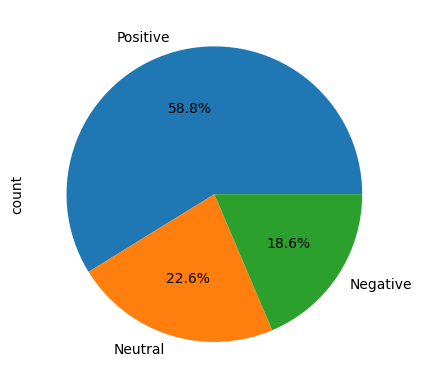

In [444]:
df['Sentiments_labels'].value_counts().plot.pie(autopct='%1.1f%%')

Grouping the data based on 'Sentiment_Labels' and 'price/value'

In [445]:
df.groupby(['Sentiments_labels','price/value']).agg({'text':'count'}).sort_values('text',ascending=False)

text
Sentiments_labels price/value      
Positive          5.990000       25
                  4.990000       12
                  19.990000      10
                  38.341702      10
                  6.990000       10
...                             ...
Neutral           59.990000       1
                  62.990000       1
                  63.990000       1
                  65.990000       1
Positive          575.000000      1

[255 rows x 1 columns]

Word cloud

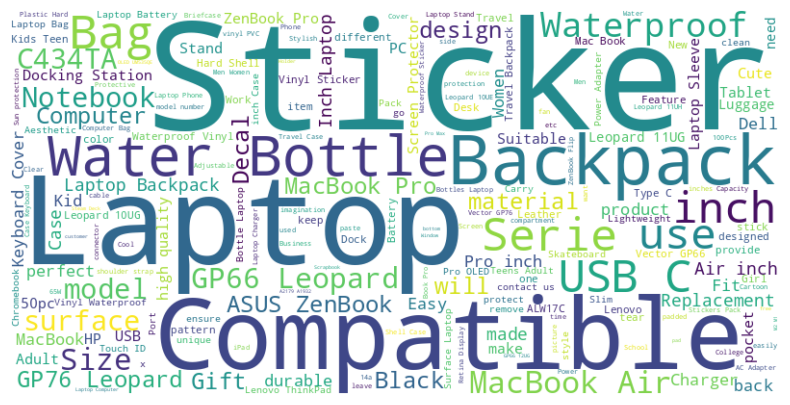

In [446]:
text_combined = ' '.join(df['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Grouping the data based on 'Sentiments_labels' and 'stars_category'

In [447]:
df.groupby(['Sentiments_labels','stars_category']).agg({'text':'count'}).sort_values('text',ascending=False)

,,text
Sentiments_labels,stars_category,
Positive,High Review,268
Neutral,High Review,106
Negative,High Review,84
Positive,Average Review,25
Negative,Average Review,8
Neutral,Average Review,7
Negative,Bad Review,1
Positive,Bad Review,1


In [448]:
df.to_csv('Cleaned_Amazon_Dataset.csv')

In [449]:
import ast

In [450]:
print(df)

                                                 title       brand  \
0    65W Universal USB C Chromebook Charger,Replace...    NELEBUTO   
1    EMPSIGN Laptop Tote bag for women 16 Inch, Sty...     EMPSIGN   
2    100Pcs Mario Stickers, Cartoon Game Mario Stic...      MOQIAN   
3    USB Docking Station, JESWO USB 3.0 Laptop Dock...       JESWO   
4    ANCBD C31N1824 Battery for Asus Chromebook Fli...       ANCBD   
..                                                 ...         ...   
495  Cartoon Duck Stickers Duck Stickers Pack 50pcs...      AYODPE   
496  GBOLE Replacement for HP Notebook 15-DY 15-DY0...       GBOLE   
497  DMKAOLLK USB-C Replacement for Lenovo Laptop C...    DMKAOLLK   
498  Cloudstyle Laptop Backpack Slim Durable Colleg...  Cloudstyle   
499  MULS L19M3PD9 57Wh Laptop Battery Replacement ...        MULS   

                                           description price/currency  \
0                                                                   $   
1            

# Milestone 2


Adding Brand to Tokens


In [451]:
def add_brand_to_tokens(row):
  brand_abbr = row['brand'].lower()
  tokens = row['tokens']
  tokens.insert(0, brand_abbr)
  tokens.insert(0, brand_abbr)
  tokens.insert(0, brand_abbr)
  tokens.insert(0, brand_abbr)
  tokens.insert(0, brand_abbr)
  return tokens


df['token_with_brnd'] = df.apply(add_brand_to_tokens, axis=1)


print(df)

                                                 title       brand  \
0    65W Universal USB C Chromebook Charger,Replace...    NELEBUTO   
1    EMPSIGN Laptop Tote bag for women 16 Inch, Sty...     EMPSIGN   
2    100Pcs Mario Stickers, Cartoon Game Mario Stic...      MOQIAN   
3    USB Docking Station, JESWO USB 3.0 Laptop Dock...       JESWO   
4    ANCBD C31N1824 Battery for Asus Chromebook Fli...       ANCBD   
..                                                 ...         ...   
495  Cartoon Duck Stickers Duck Stickers Pack 50pcs...      AYODPE   
496  GBOLE Replacement for HP Notebook 15-DY 15-DY0...       GBOLE   
497  DMKAOLLK USB-C Replacement for Lenovo Laptop C...    DMKAOLLK   
498  Cloudstyle Laptop Backpack Slim Durable Colleg...  Cloudstyle   
499  MULS L19M3PD9 57Wh Laptop Battery Replacement ...        MULS   

                                           description price/currency  \
0                                                                   $   
1            

Categories Mapping

In [452]:
categories = {
    "Good Price, Good Sentiment, Good Rating": [True, True, True],
    "Good Price, Good Sentiment, Bad Rating": [True, True, False],
    "Good Price, Bad Sentiment, Good Rating": [True, False, True],
    "Good Price, Bad Sentiment, Bad Rating": [True, False, False],
    "Bad Price, Good Sentiment, Good Rating": [False, True, True],
    "Bad Price, Good Sentiment, Bad Rating": [False, True, False],
    "Bad Price, Bad Sentiment, Good Rating": [False, False, True],
    "Bad Price, Bad Sentiment, Bad Rating": [False, False, False]
}

Assigning Categories and Metrics

In [453]:
df['category'] = ''
df['metrics'] = ''


for index, row in df.iterrows():
    mask = [
        (row['price/value'] <= 50),
        (row['Sentiments_labels'] in ["Positive", "Neutral"]),
        (row['stars'] > 2.5)
    ]
    print(mask)

    for category, metrics in categories.items():
        if mask == metrics:
            df.at[index, 'category'] = category
            break
df['metrics'] = df['category'].map(categories.get)

[True, True, True]
[True, True, True]
[True, False, True]
[False, False, True]
[True, True, True]
[False, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, False, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, False, True]
[True, False, True]
[True, True, True]
[False, False, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[False, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, False, True]
[True, True, True]
[True, False, True]
[True, False, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, False, True]
[True, False, True]
[True, True, True]
[True, False, True]
[True, True, True]
[True, True, True]
[True, True, True]
[True, True, Tr

In [454]:
print(df)

                                                 title       brand  \
0    65W Universal USB C Chromebook Charger,Replace...    NELEBUTO   
1    EMPSIGN Laptop Tote bag for women 16 Inch, Sty...     EMPSIGN   
2    100Pcs Mario Stickers, Cartoon Game Mario Stic...      MOQIAN   
3    USB Docking Station, JESWO USB 3.0 Laptop Dock...       JESWO   
4    ANCBD C31N1824 Battery for Asus Chromebook Fli...       ANCBD   
..                                                 ...         ...   
495  Cartoon Duck Stickers Duck Stickers Pack 50pcs...      AYODPE   
496  GBOLE Replacement for HP Notebook 15-DY 15-DY0...       GBOLE   
497  DMKAOLLK USB-C Replacement for Lenovo Laptop C...    DMKAOLLK   
498  Cloudstyle Laptop Backpack Slim Durable Colleg...  Cloudstyle   
499  MULS L19M3PD9 57Wh Laptop Battery Replacement ...        MULS   

                                           description price/currency  \
0                                                                   $   
1            

Adding Brand Prefix to Text

In [455]:
def add_text_brand_prefix(row):
    return (row['brand'].lower() + ' ') * 5 + ' '+row['text']

df['text_brnd'] = df.apply(add_text_brand_prefix, axis=1)

print(df)

                                                 title       brand  \
0    65W Universal USB C Chromebook Charger,Replace...    NELEBUTO   
1    EMPSIGN Laptop Tote bag for women 16 Inch, Sty...     EMPSIGN   
2    100Pcs Mario Stickers, Cartoon Game Mario Stic...      MOQIAN   
3    USB Docking Station, JESWO USB 3.0 Laptop Dock...       JESWO   
4    ANCBD C31N1824 Battery for Asus Chromebook Fli...       ANCBD   
..                                                 ...         ...   
495  Cartoon Duck Stickers Duck Stickers Pack 50pcs...      AYODPE   
496  GBOLE Replacement for HP Notebook 15-DY 15-DY0...       GBOLE   
497  DMKAOLLK USB-C Replacement for Lenovo Laptop C...    DMKAOLLK   
498  Cloudstyle Laptop Backpack Slim Durable Colleg...  Cloudstyle   
499  MULS L19M3PD9 57Wh Laptop Battery Replacement ...        MULS   

                                           description price/currency  \
0                                                                   $   
1            

Splitting the Dataset

In [456]:
train_dataset, test_dataset = df, df

In [457]:
for index, row in df.iterrows():
    print("Text_brnd:", row['text_brnd'])
    print("Category:", row['category'])
    print()

Text_brnd: nelebuto nelebuto nelebuto nelebuto nelebuto  65W Universal USB C Chromebook Charger,Replacement Lenovo Yoga Google Asus Acer Dell Laptop Charger,AC Adapter Compatible with Lenovo X1 Thinkpad 45W Type C Charger 
Category: Good Price, Good Sentiment, Good Rating

Text_brnd: empsign empsign empsign empsign empsign  EMPSIGN Laptop Tote bag for women 16 Inch, Stylish Computer Shoulder Tote Bag for Work, Large Capacity Quilted Laptop Briefcase, Waterproof Women Business Office Bag, Quilted Black 
Category: Good Price, Good Sentiment, Good Rating

Text_brnd: moqian moqian moqian moqian moqian  100Pcs Mario Stickers, Cartoon Game Mario Stickers for Kids, Mario Bros Decal Gifts, Waterproof Vinyl Stickers for Teen Adut Water Bottle, Laptop, Skateboard 100Pcs Japanese Cartoon Game Mari Stickers for Adult Girl Boy Notebook, Computer, Luggage, Phone, Scrapbook, Guitar, Bike, Car, Helmet, Snowboard, Bumper, Cup.
Category: Good Price, Bad Sentiment, Good Rating

Text_brnd: jeswo jeswo jes

TensorFlow Dataset Preparation

In [458]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [459]:
df = pd.DataFrame(df)

dataset = tf.data.Dataset.from_tensor_slices((df['text_brnd'].values, df['category'].values))


VOCAB_SIZE=1000

encoder = TextVectorization(max_tokens=VOCAB_SIZE)

encoder.adapt(dataset.map(lambda text_brnd, category: text_brnd))

vocab_size = len(encoder.get_vocabulary())

print("Vocabulary size:", vocab_size)

Vocabulary size: 1000


Viewing Vocabulary

In [460]:
vocab = np.array(encoder.get_vocabulary())
vocab[:500]

array(['', '[UNK]', 'for', 'the', 'and', 'laptop', 'with', 'to',
       'stickers', 'your', 'of', 'a', 'backpack', 'you', 'inch', 'is',
       'compatible', 'case', 'bag', 'macbook', 'on', 'water', 'pro',
       'waterproof', '15', 'it', 'usb', 'sticker', 'are', 'leopard', 'in',
       'vinyl', 'or', 'can', 'screen', 'surface', 'not', 'series', 'this',
       'x', 'gp66', 'hp', 'travel', 'lenovo', 'air', 'computer', 'be',
       'c', 'please', 'use', 'model', 'power', 'gp76', '2', 'dell',
       'battery', 'cover', 'women', 'our', 'kids', 'adapter', 'asus', '1',
       'any', 'charger', 'phone', 'all', 'will', 'replacement', 'bottle',
       'luggage', 'from', '13', 'that', 'laptops', '3', 'zenbook',
       'lovevook', 'if', 'easy', 'size', 'bottles', '14', 'stand', 'book',
       'notebook', 'hard', 'we', 'touch', '156', 'new', 'made', 'vector',
       'skateboard', 'keyboard', 'sleeve', 'teens', 'design', 'back',
       'no', 'as', 'perfect', 'other', 'generic', 'black', 'protector',

Initializing the Vocab

In [461]:
vocab = np.array(encoder.get_vocabulary())
print(vocab[:500])

['' '[UNK]' 'for' 'the' 'and' 'laptop' 'with' 'to' 'stickers' 'your' 'of'
 'a' 'backpack' 'you' 'inch' 'is' 'compatible' 'case' 'bag' 'macbook' 'on'
 'water' 'pro' 'waterproof' '15' 'it' 'usb' 'sticker' 'are' 'leopard' 'in'
 'vinyl' 'or' 'can' 'screen' 'surface' 'not' 'series' 'this' 'x' 'gp66'
 'hp' 'travel' 'lenovo' 'air' 'computer' 'be' 'c' 'please' 'use' 'model'
 'power' 'gp76' '2' 'dell' 'battery' 'cover' 'women' 'our' 'kids'
 'adapter' 'asus' '1' 'any' 'charger' 'phone' 'all' 'will' 'replacement'
 'bottle' 'luggage' 'from' '13' 'that' 'laptops' '3' 'zenbook' 'lovevook'
 'if' 'easy' 'size' 'bottles' '14' 'stand' 'book' 'notebook' 'hard' 'we'
 'touch' '156' 'new' 'made' 'vector' 'skateboard' 'keyboard' 'sleeve'
 'teens' 'design' 'back' 'no' 'as' 'perfect' 'other' 'generic' 'black'
 'protector' 'men' 'display' 'shoulder' 'm2' 'work' 'latitude' 'cute'
 'durable' 'protection' 'docking' 'type' 'station' 'off' 'more' 'make'
 '100' 'pack' 'mosiso' 'have' 'gift' 'decal' 'girls' 'material'

Encoding the Vocab

In [462]:
encoded = encoder(vocab)[:500].numpy()
print(encoded)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]

Word2Vec Model

In [463]:
word2vec_model = Word2Vec(encoded, min_count=1)

Getting Embeddings

In [464]:
def get_embeddings(tokens, model):
    embeddings = []
    for token in tokens:
        if token in model.wv:
            embeddings.append(model.wv[token])
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

neural_embeddings = np.array([get_embeddings(tokens, word2vec_model) for tokens in encoded])
print(neural_embeddings)

[[-0.00473728  0.00113134 -0.00818349 ... -0.00790107 -0.00072855
   0.00063938]
 [ 0.00041948  0.0039267   0.00450865 ...  0.00376328  0.00361392
  -0.00983729]
 [-0.00475663  0.00691938 -0.00709344 ... -0.00629932 -0.00676786
   0.00145867]
 ...
 [-0.0002985   0.00665674 -0.00124    ... -0.00372649 -0.00392436
   0.00723419]
 [ 0.00201931  0.0082597  -0.00829752 ... -0.00082175 -0.00995312
   0.00588423]
 [-0.00053623  0.00023643  0.00510335 ... -0.00704156  0.00090146
   0.00639253]]


Neural Network Model for Classification

In [465]:
categories = {
    "Good Price, Good Sentiment, Good Rating": 0,
    "Good Price, Good Sentiment, Bad Rating": 1,
    "Good Price, Bad Sentiment, Good Rating": 2,
    "Good Price, Bad Sentiment, Bad Rating": 3,
    "Bad Price, Good Sentiment, Good Rating": 4,
    "Bad Price, Good Sentiment, Bad Rating": 5,
    "Bad Price, Bad Sentiment, Good Rating": 6,
    "Bad Price, Bad Sentiment, Bad Rating": 7
}

df['label'] = df['category'].map(categories)

y_one_hot = tf.keras.utils.to_categorical(df['label'], num_classes=len(categories))

num_samples, num_features = encoded.shape
inputs = tf.keras.layers.Input(shape=(None, num_features))

x = LSTM(64, return_sequences=True)(inputs)
x = LSTM(40)(x)

outputs = Dense(len(categories), activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_train, x_test, y_train, y_test = train_test_split(neural_embeddings, y_one_hot, test_size=0.2, random_state=42)

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
10/10 [==============================] - 7s 151ms/step - loss: 2.0151 - accuracy: 0.5969 - val_loss: 1.8473 - val_accuracy: 0.6125
Epoch 2/50
10/10 [==============================] - 0s 22ms/step - loss: 1.4085 - accuracy: 0.6719 - val_loss: 1.5320 - val_accuracy: 0.6125
Epoch 3/50
10/10 [==============================] - 0s 24ms/step - loss: 1.2188 - accuracy: 0.6719 - val_loss: 1.2432 - val_accuracy: 0.6125
Epoch 4/50
10/10 [==============================] - 0s 24ms/step - loss: 1.0817 - accuracy: 0.6719 - val_loss: 1.1865 - val_accuracy: 0.6125
Epoch 5/50
10/10 [==============================] - 0s 22ms/step - loss: 1.0387 - accuracy: 0.6719 - val_loss: 1.1734 - val_accuracy: 0.6125
Epoch 6/50
10/10 [==============================] - 0s 25ms/step - loss: 1.0167 - accuracy: 0.6719 - val_loss: 1.1760 - val_accuracy: 0.6125
Epoch 7/50
10/10 [==============================] - 0s 23ms/step - loss: 1.0037 - accuracy: 0.6719 - val_loss: 1.1592 - val_accuracy: 0.6125
Epoch 8/50
1

Making Predictions

In [466]:
predictions = model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)

predicted_categories = [list(categories.keys())[label] for label in predicted_labels]

original_texts=df['text_brnd']

print("Predicted Categories for Test Data:")
for i in range(len(x_test)):
    print("Original Text:", original_texts[i])  # Assuming original_texts contains the original text for each test sample
    print("Test Sample:", x_test[i])
    print("Predicted Category:", predicted_categories[i])
    print()

4/4 [==============================] - 2s 8ms/step
Predicted Categories for Test Data:
Original Text: nelebuto nelebuto nelebuto nelebuto nelebuto  65W Universal USB C Chromebook Charger,Replacement Lenovo Yoga Google Asus Acer Dell Laptop Charger,AC Adapter Compatible with Lenovo X1 Thinkpad 45W Type C Charger 
Test Sample: [ 6.2039495e-03  1.4124584e-03 -2.0156396e-03 -1.5734065e-03
  1.0915637e-03 -5.3713880e-03  2.8547870e-03 -4.6439539e-03
  9.2674782e-03 -1.4795458e-03  6.4609048e-04 -1.3829613e-03
 -5.3297565e-03  1.9181847e-04 -1.9088769e-03  3.4822440e-03
  8.5415067e-03  9.6302144e-03  2.2807955e-03  3.6765742e-03
 -2.4425399e-03 -2.0528245e-03 -3.2950402e-04 -9.6917674e-03
 -1.6770340e-03  3.2976819e-03 -6.0938825e-03  4.2155515e-03
 -6.4595356e-03 -1.2873650e-03 -9.0181027e-03 -9.3034217e-03
 -6.7316890e-03 -2.1027983e-03 -8.2308864e-03 -7.4219229e-03
 -8.8523896e-03 -6.2575913e-03  2.2985744e-03  5.0832690e-03
  8.1703225e-03 -7.7906824e-03 -7.1414937e-03 -5.4073595e-03
  

Visualizing Training History

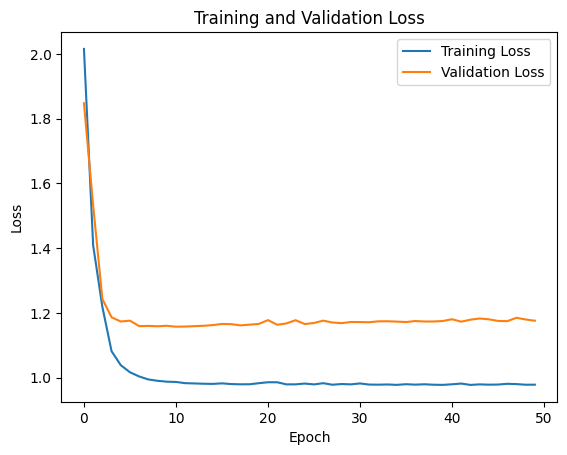

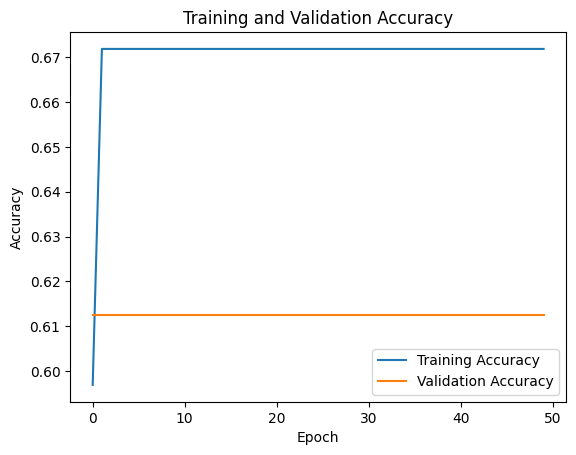

4/4 [==============================] - 0s 14ms/step - loss: 0.9365 - accuracy: 0.6700
Test Loss: 0.9364688992500305
Test Accuracy: 0.6700000166893005


In [467]:
plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [468]:
df.to_csv("M2Dataset.csv")

#Milestone 3 "Importing a built in Model"

## Fine Tuning Transformer for MultiClass Text Classification

### Introduction

We will be fine tuning a transformer model for the **Multiclass text classification** problem.
This is one of the most common business problems where a given piece of text/sentence/document needs to be classified into one of the categories out of the given list.

#### Flow of the notebook

The notebook will be divided into seperate sections to provide a organized walk through for the process used. This process can be modified for individual use cases. The sections are:

1. [Importing Python Libraries and preparing the environment](#section01)
2. [Importing and Pre-Processing the domain data](#section02)
3. [Preparing the Dataset and Dataloader](#section03)
4. [Creating the Neural Network for Fine Tuning](#section04)
5. [Fine Tuning the Model](#section05)
6. [Validating the Model Performance](#section06)
7. [Saving the model and artifacts for Inference in Future](#section07)

#### Technical Details

This script leverages on multiple tools designed by other teams. Details of the tools used below. Please ensure that these elements are present in your setup to successfully implement this script.

 - Data:
	 - We are referring only to the first csv file from the data dump: `M2Dataset.csv`
	 - There are `500` rows of data.  Where each row has the following data-point:
		 - ID Numeric  
		 - TITLE `title`
		 - Brand `brand`
		 - Description `description`
		 - Currency `price/currency`
		 - Price Value `price/value`
		 - Stars `stars`
		 - Reviews Count `reviewsCount`
		 - Concatenated Columns text `text`
		 - Tokens `tokens`
		 - Sentiments Score `sentiment_score`
		 - Sentiments Labels `Sentiments_labels`
		 - Stars Category `stars_category`
		 - Brand Name added to tokens `token_with_brnd`
		 - Category `category`
		 - Brand + Tokens as text `text_brnd`
		 - Label (0={Good Price, Good Sentiment, Good Rating}, 1={Good Price, Good Sentiment, Bad Rating}, 2={Good Price, Bad Sentiment, Good Rating}, 3={Good Price, Bad Sentiment, Bad Rating}, 4={Bad Price, Good Sentiment, Good Rating}, 5={Bad Price, Good Sentiment, Bad Rating}, 6={Bad Price, Bad Sentiment, Good Rating}, 7={Bad Price, Bad Sentiment, Bad Rating})


 - Language Model Used:
	 - DistilBERT this is a smaller transformer model as compared to BERT or Roberta. It is created by process of distillation applied to Bert.
	 - [Blog-Post](https://medium.com/huggingface/distilbert-8cf3380435b5)
	 - [Research Paper](https://arxiv.org/abs/1910.01108)
     - [Documentation for python](https://huggingface.co/transformers/model_doc/distilbert.html)


 - Hardware Requirements:
	 - Python 3.6 and above
	 - Pytorch, Transformers and All the stock Python ML Libraries
	 - GPU enabled setup


 - Script Objective:
	 - The objective of this script is to fine tune DistilBERT to be able to classify a news headline into the following categories:
		 - Good Price, Good Sentiment, Good Rating : 0
		 - Good Price, Good Sentiment, Bad Rating  : 1
		 - Good Price, Bad Sentiment, Good Rating  : 2
		 - Good Price, Bad Sentiment, Bad Rating   : 3
		 - Bad Price, Good Sentiment, Good Rating  : 4
		 - Bad Price, Good Sentiment, Bad Rating   : 5
		 - Bad Price, Bad Sentiment, Good Rating   : 6
		 - Bad Price, Bad Sentiment, Bad Rating    : 7


<a id='section01'></a>
### Importing Python Libraries and preparing the environment

At this step we will be importing the libraries and modules needed to run our script. Libraries are:
* Pandas
* Pytorch
* Pytorch Utils for Dataset and Dataloader
* Transformers
* DistilBERT Model and Tokenizer

Followed by that we will preapre the device for CUDA execeution. This configuration is needed if you want to leverage on onboard GPU better use GPU T4 for better performance.

In [469]:
import pandas as pd
import torch
import transformers
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertModel, DistilBertTokenizer

In [470]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

<a id='section02'></a>
### Importing and Pre-Processing the domain data

We will be working with the data and preparing for fine tuning purposes.
*Assuming that the `M2Dataset.csv` is already downloaded in the directory*


In [471]:
df = pd.read_csv('M2Dataset.csv')
df = df.rename(columns={'price/value': 'price'})
print(df)

     Unnamed: 0                                              title  \
0             0  65W Universal USB C Chromebook Charger,Replace...   
1             1  EMPSIGN Laptop Tote bag for women 16 Inch, Sty...   
2             2  100Pcs Mario Stickers, Cartoon Game Mario Stic...   
3             3  USB Docking Station, JESWO USB 3.0 Laptop Dock...   
4             4  ANCBD C31N1824 Battery for Asus Chromebook Fli...   
..          ...                                                ...   
495         495  Cartoon Duck Stickers Duck Stickers Pack 50pcs...   
496         496  GBOLE Replacement for HP Notebook 15-DY 15-DY0...   
497         497  DMKAOLLK USB-C Replacement for Lenovo Laptop C...   
498         498  Cloudstyle Laptop Backpack Slim Durable Colleg...   
499         499  MULS L19M3PD9 57Wh Laptop Battery Replacement ...   

          brand                                        description  \
0      NELEBUTO                                                NaN   
1       EMPSIGN    

<a id='section03'></a>
### Preparing the Dataset and Dataloader

We will start with defining few key variables that will be used later during the training/fine tuning stage.
Followed by creation of Dataset class - This defines how the text is pre-processed before sending it to the neural network. We will also define the Dataloader that will feed  the data in batches to the neural network for suitable training and processing.
Dataset and Dataloader are constructs of the PyTorch library for defining and controlling the data pre-processing and its passage to neural network. For further reading into Dataset and Dataloader read the [docs at PyTorch](https://pytorch.org/docs/stable/data.html)

#### *Triage* Dataset Class
- This class is defined to accept the Dataframe as input and generate tokenized output that is used by the DistilBERT model for training.
- We are using the DistilBERT tokenizer to tokenize the data in the `text_brnd`, `price`, `Sentiments_labels` column of the dataframe.
- The tokenizer uses the `encode_plus` method to perform tokenization and generate the necessary outputs, namely: `ids`, `attention_mask`
- To read further into the tokenizer, [refer to this document](https://huggingface.co/transformers/model_doc/distilbert.html#distilberttokenizer)
- `target` is the encoded category on the news headline.
- The *Triage* class is used to create 2 datasets, for training and for validation.
- *Training Dataset* is used to fine tune the model: **80% of the original data**
- *Validation Dataset* is used to evaluate the performance of the model. The model has not seen this data during training.

#### Dataloader
- Dataloader is used to for creating training and validation dataloader that load data to the neural network in a defined manner. This is needed because all the data from the dataset cannot be loaded to the memory at once, hence the amount of dataloaded to the memory and then passed to the neural network needs to be controlled.
- This control is achieved using the parameters such as `batch_size` and `max_len`.
- Training and Validation dataloaders are used in the training and validation part of the flow respectively

In [472]:
MAX_LEN = 512
TRAIN_BATCH_SIZE = 4
VALID_BATCH_SIZE = 2
EPOCHS = 10
LEARNING_RATE = 1e-05
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')

ImportError: cannot import name 'GGUF_CONFIG_MAPPING' from 'transformers.integrations' (/usr/local/lib/python3.10/dist-packages/transformers/integrations/__init__.py)

In [ ]:

class Triage(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __getitem__(self, index):
        title = str(self.data.text_brnd[index])
        priceValue = str(self.data.price[index])
        sentimentLabel = str(self.data.Sentiments_labels[index])
        starCat = str(self.data.stars_category[index])

        title = " ".join(title.split())
        starCat = " ".join(starCat.split())

        # Combine inputs into a single string with a separator
        combined_input = f"{title} [SEP] {priceValue} [SEP] {sentimentLabel} [SEP] {starCat}"

        inputs = self.tokenizer.encode_plus(
            combined_input,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'targets': torch.tensor(self.data.label[index], dtype=torch.long)
        }

    def __len__(self):
        return self.len


In [ ]:
train_size = 0.8
train_dataset=df.sample(frac=train_size,random_state=200)
test_dataset=df.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)


print("FULL Dataset: {}".format(df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))

training_set = Triage(train_dataset, tokenizer, MAX_LEN)
testing_set = Triage(test_dataset, tokenizer, MAX_LEN)

In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

<a id='section04'></a>
### Creating the Neural Network for Fine Tuning

#### Neural Network
 - We will be creating a neural network with the `DistillBERTClass`.
 - This network will have the DistilBERT Language model followed by a `dropout` and finally a `Linear` layer to obtain the final outputs.
 - The data will be fed to the DistilBERT Language model as defined in the dataset.
 - Final layer outputs is what will be compared to the `encoded category` to determine the accuracy of models prediction.
 - We will initiate an instance of the network called `model`. This instance will be used for training and then to save the final trained model for future inference.

#### Loss Function and Optimizer
 - `Loss Function` and `Optimizer` and defined in the next cell.
 - The `Loss Function` is used the calculate the difference in the output created by the model and the actual output.
 - `Optimizer` is used to update the weights of the neural network to improve its performance.

#### Further Reading
- You can refer to my [Pytorch Tutorials](https://github.com/abhimishra91/pytorch-tutorials) to get an intuition of Loss Function and Optimizer.
- [Pytorch Documentation for Loss Function](https://pytorch.org/docs/stable/nn.html#loss-functions)
- [Pytorch Documentation for Optimizer](https://pytorch.org/docs/stable/optim.html)
- Refer to the links provided on the top of the notebook to read more about DistiBERT.

In [ ]:
class DistillBERTClass(torch.nn.Module):
    def __init__(self):
        super(DistillBERTClass, self).__init__()
        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, 8)

    def forward(self, input_ids, attention_mask):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [ ]:
model = DistillBERTClass()
model.to(device)

In [ ]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

<a id='section05'></a>
### Fine Tuning the Model

After all the effort of loading and preparing the data and datasets, creating the model and defining its loss and optimizer. This is probably the easier steps in the process.

Here we define a training function that trains the model on the training dataset created above, specified number of times (EPOCH), An epoch defines how many times the complete data will be passed through the network.

Following events happen in this function to fine tune the neural network:
- The dataloader passes data to the model based on the batch size.
- Subsequent output from the model and the actual category are compared to calculate the loss.
- Loss value is used to optimize the weights of the neurons in the network.
- After every 5000 steps the loss value is printed in the console.

As you can see just in 1 epoch by the final step the model was working with a miniscule loss of 0.0002485 i.e. the output is extremely close to the actual output.

In [ ]:
def calcuate_accu(big_idx, targets):
    n_correct = (big_idx==targets).sum().item()
    return n_correct

In [ ]:
def train(epoch):
    model.train()
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0

    for _, data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype=torch.long)
        mask = data['mask'].to(device, dtype=torch.long)
        targets = data['targets'].to(device, dtype=torch.long)

        outputs = model(ids, mask)
        loss = loss_function(outputs, targets)
        tr_loss += loss.item()
        big_val, big_idx = torch.max(outputs.data, dim=1)
        n_correct += (big_idx == targets).sum().item()

        nb_tr_steps += 1
        nb_tr_examples += targets.size(0)

        if _ % 5000 == 0:
            loss_step = tr_loss / nb_tr_steps
            accu_step = (n_correct * 100) / nb_tr_examples
            print(f"Training Loss per 5000 steps: {loss_step}")
            print(f"Training Accuracy per 5000 steps: {accu_step}")

        optimizer.zero_grad()
        loss.backward()
        ## When Using GPU
        optimizer.step()

    epoch_loss = tr_loss / nb_tr_steps
    epoch_accu = (n_correct * 100) / nb_tr_examples
    print(f'The Total Accuracy for Epoch {epoch}: {epoch_accu}')
    print(f"Training Loss Epoch: {epoch_loss}")
    print(f"Training Accuracy Epoch: {epoch_accu}")

    return epoch_loss, epoch_accu

In [ ]:
print(df)

In [ ]:
for epoch in range(EPOCHS):
    train(epoch)

<a id='section06'></a>
### Validating the Model

During the validation stage we pass the unseen data(Testing Dataset) to the model. This step determines how good the model performs on the unseen data.

This unseen data is the 20% of `M2Dataset.csv` which was seperated during the Dataset creation stage.
During the validation stage the weights of the model are not updated. Only the final output is compared to the actual value. This comparison is then used to calcuate the accuracy of the model.

As you can see the model is predicting the correct category of a given headline to a 85.00% accuracy.

In [ ]:
def valid(model, testing_loader):
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0; tr_loss = 0.0
    nb_tr_steps = 0;
    nb_tr_examples = 0;
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, mask).squeeze()
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()
            big_val, big_idx = torch.max(outputs.data, dim=1)
            n_correct += calcuate_accu(big_idx, targets)

            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)

            if _%5000==0:
                loss_step = tr_loss/nb_tr_steps
                accu_step = (n_correct*100)/nb_tr_examples
                print(f"Validation Loss per 100 steps: {loss_step}")
                print(f"Validation Accuracy per 100 steps: {accu_step}")
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Validation Loss Epoch: {epoch_loss}")
    print(f"Validation Accuracy Epoch: {epoch_accu}")

    return epoch_loss,epoch_accu


In [ ]:
print('This is the validation section to print the accuracy and see how it performs')
print('Here we are leveraging on the dataloader created for the validation dataset, the approach is using more of PyTorch')

_, acc = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)

## Post Processing
### Printing Predictions , Plotting Training and Validation Metrics

This Python script is used to visualize the training and validation metrics (loss and accuracy) of a machine learning model over multiple epochs using Matplotlib using the labels.

In this cell the model is trained, validated and evaluated again printing the predicitions with each epoch and after each epoch the values for the train loss, validate loss, train accuracy and validate accuracy is stored and got appended so that the graphs can be plotted

In [ ]:
import matplotlib.pyplot as plt

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []


num_epochs = 10


for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train(epoch)
    val_loss, val_acc = valid(model, testing_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
